In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import os
import cartopy.crs as ccrs

In [2]:
path_data = os.path.join(os.environ['PROJDIR'], 'E3SM', 'output', 
                         'ERW_off_hcru_hcru_ICB1850CNRDCTCBC_ad_spinup', 'run')

In [3]:
hr = xr.open_dataset(os.path.join(path_data, 'ERW_off_hcru_hcru_ICB1850CNRDCTCBC_ad_spinup.elm.h0.0201-01-01-00000.nc'))

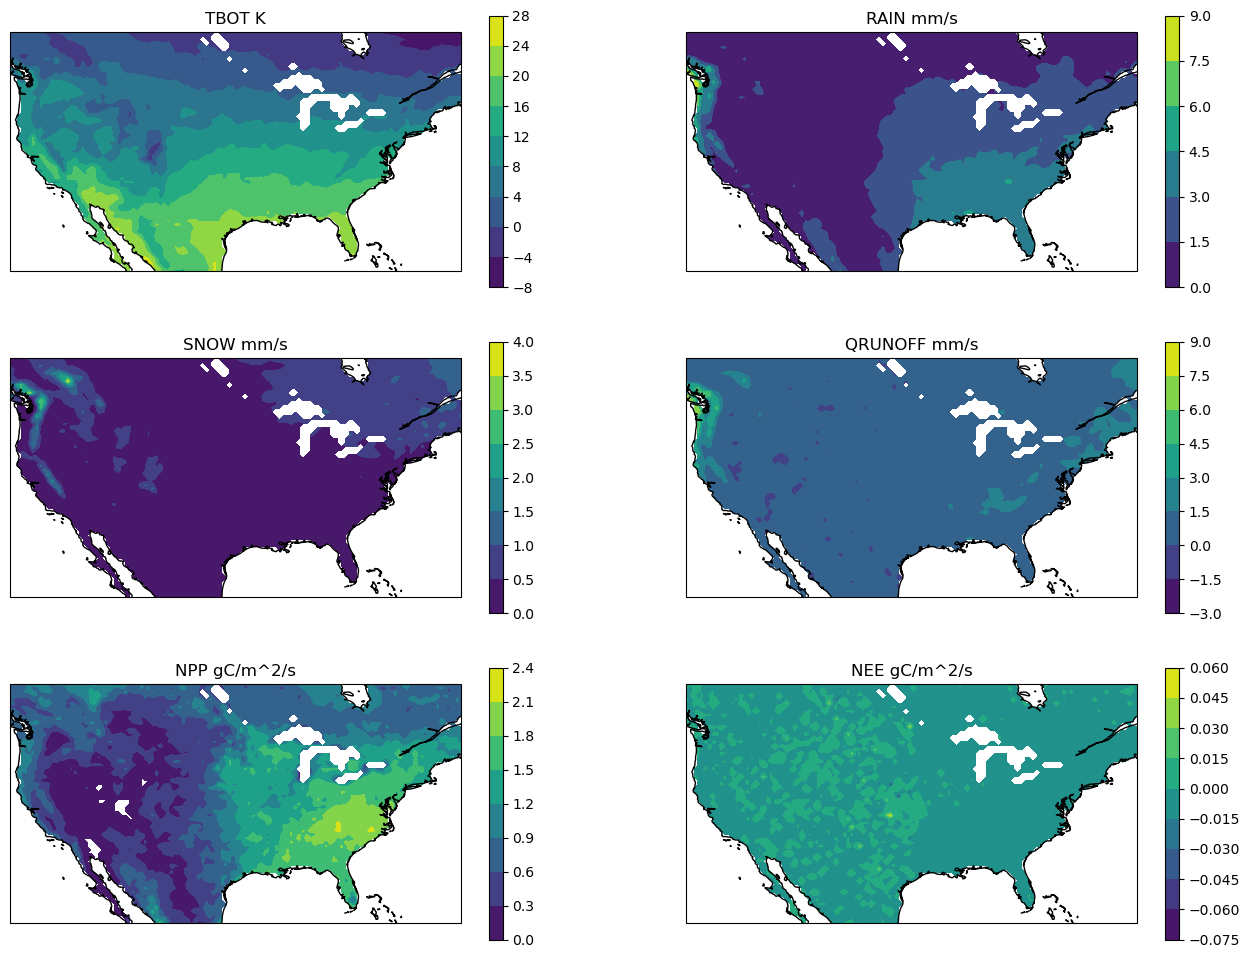

In [4]:
fig, axes = plt.subplots(3, 2, figsize = (16, 12), subplot_kw = {'projection': ccrs.PlateCarree()})

for i, var in enumerate(['TBOT', 'RAIN', 'SNOW', 'QRUNOFF', 'NPP', 'NEE']):
    ax = axes.flat[i]
    ax.coastlines()
    if var != 'TBOT':
        data = hr[var][0, :, :] * 86400
    else:
        data = hr[var][0, :, :] - 273.15
    cf = ax.contourf(hr['lon'], hr['lat'], data)
    plt.colorbar(cf, ax = ax)
    ax.set_title(var + ' ' + hr[var].attrs['units'])

In [5]:
hr.close()